In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from dlf.sequential import Sequential
from dlf.layers.dense import Dense
from dlf.activation_functions.tanh import TanH
from dlf.activation_functions.relu import ReLU
from dlf.losses.mse import MSE
from dlf.optimizers.sgd import StochasticGradientDescent
from dlf.normalization.batchnorm import BatchNormalization
from dlf.trainer import Trainer
from dlf.schedulers.step import StepScheduler

from dlf.utils.dataset import train_test_split

In [3]:
m, n = 4000, 1
inputs = np.random.randn(m, n)
labels = 2 * inputs + 1

In [4]:
training_inputs, training_labels, testing_inputs, testing_labels = train_test_split(inputs, labels, 0.7)
testing_inputs, testing_labels, validation_inputs, validation_labels = train_test_split(testing_inputs, testing_labels, 0.5)

In [5]:
print(training_inputs.shape, training_labels.shape)
print(validation_inputs.shape, validation_labels.shape)
print(testing_inputs.shape, testing_labels.shape)

(2800, 1) (2800, 1)
(600, 1) (600, 1)
(600, 1) (600, 1)


In [6]:
training_set = (training_inputs, training_labels)
validation_set = (validation_inputs, validation_labels)
testing_set = (testing_inputs, testing_labels)

In [7]:
model = Sequential([
    Dense(n, 8),
    TanH(),
    BatchNormalization(),
    Dense(8, 16),
    ReLU(),
    Dense(16, 1)
])

In [8]:
n_epochs = 100
learning_rate = 0.01
batch_size = 512
step_size = 10
decay_rate = 0.9

In [9]:
loss = MSE()
# loss = MAE()

In [10]:
optimizer = StochasticGradientDescent(learning_rate)

In [11]:
trainer = Trainer(model, optimizer, loss, lr_scheduler=StepScheduler(step_size, decay_rate))

In [12]:
history = trainer.fit(training_set, n_epochs, batch_size)

[1/100]: Training Loss = 0.6668588346990674
[2/100]: Training Loss = 0.3668371944124807
[3/100]: Training Loss = 0.2795927873721346
[4/100]: Training Loss = 0.22843738170631744
[5/100]: Training Loss = 0.19448604083906737
[6/100]: Training Loss = 0.17017092914374293
[7/100]: Training Loss = 0.1513719056613176
[8/100]: Training Loss = 0.13646488189707984
[9/100]: Training Loss = 0.12368561049030144
[10/100]: Training Loss = 0.11266223223480706
[11/100]: Training Loss = 0.10179562528620424
[12/100]: Training Loss = 0.09398390851383308
[13/100]: Training Loss = 0.0868118076772534
[14/100]: Training Loss = 0.08030524666678855
[15/100]: Training Loss = 0.07435884048132832
[16/100]: Training Loss = 0.06899701008243089
[17/100]: Training Loss = 0.06401459973712578
[18/100]: Training Loss = 0.059435860100626924
[19/100]: Training Loss = 0.055199136246878396
[20/100]: Training Loss = 0.051310175061011085
[21/100]: Training Loss = 0.04712186423390772
[22/100]: Training Loss = 0.04413515773474892

In [ ]:
history

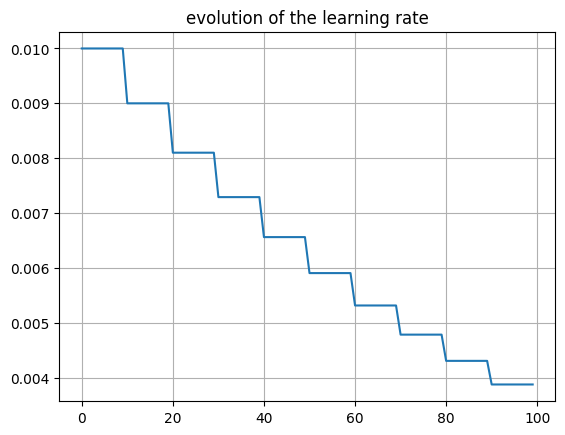

In [13]:
plt.plot(history["learning_rates"])
plt.title("evolution of the learning rate")
plt.grid()
plt.show()

In [ ]:
model.save("linear_regression.dlfm")

In [ ]:
Sequential.load("linear_regression.dlfm")